In [12]:
import os
import cv2
import numpy as np
import utils as u
from box_detection import box_detection
import matplotlib.pyplot as plt 

['0.png', '1.png', '2.png', '3.png', '4.png', '5.png']


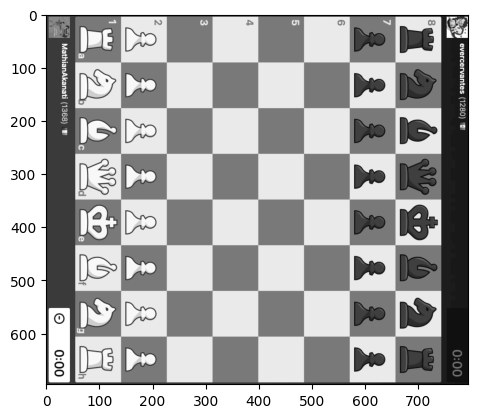

In [13]:
game_images_path = '.././photos_test/chess.com/'
path_image_list = sorted(os.listdir(game_images_path))
print(path_image_list)
move_nb = len(path_image_list)

# List d'images représentant les différents boards
move_image_list = [cv2.imread('.././photos_test/chess.com/' + path,0) for path in path_image_list] 

plt.imshow(move_image_list[0], cmap = 'gray')
plt.show()


In [14]:
#### TEST Partie Guilhem  #####

def get_boxes_from_image(board_img):  # A modifier
    boxes_test = u.get_test_boxes()
    boxes = boxes_test
    return boxes

###### Fin partie Guilhem

# parameters
binary_threshold = 200
use_median = False
hough_lines_threshold = 150

list_coord_boxes = [ box_detection('.././photos_test/chess.com/' + path, binary_threshold, use_median, hough_lines_threshold)[1] for path in path_image_list] # liste de liste de coordonnées de box
print(len(list_coord_boxes[0]))


64


In [15]:
print(list_coord_boxes[0])

{'a1': [(65, 5), (141, 5), (65, 89), (141, 89)], 'a2': [(141, 5), (226, 5), (141, 89), (226, 89)], 'a3': [(226, 5), (313, 5), (226, 89), (313, 89)], 'a4': [(313, 5), (398, 5), (313, 89), (398, 89)], 'a5': [(398, 5), (483, 5), (398, 89), (483, 89)], 'a6': [(483, 5), (569, 5), (483, 89), (569, 89)], 'a7': [(569, 5), (655, 5), (569, 89), (655, 89)], 'a8': [(655, 5), (741, 5), (655, 89), (741, 89)], 'b1': [(65, 89), (141, 89), (65, 175), (141, 175)], 'b2': [(141, 89), (226, 89), (141, 175), (226, 175)], 'b3': [(226, 89), (313, 89), (226, 175), (313, 175)], 'b4': [(313, 89), (398, 89), (313, 175), (398, 175)], 'b5': [(398, 89), (483, 89), (398, 175), (483, 175)], 'b6': [(483, 89), (569, 89), (483, 175), (569, 175)], 'b7': [(569, 89), (655, 89), (569, 175), (655, 175)], 'b8': [(655, 89), (741, 89), (655, 175), (741, 175)], 'c1': [(65, 175), (141, 175), (65, 263), (141, 263)], 'c2': [(141, 175), (226, 175), (141, 263), (226, 263)], 'c3': [(226, 175), (313, 175), (226, 263), (313, 263)], 'c4':

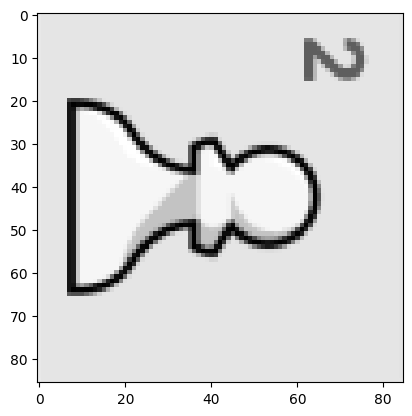

In [16]:
#liste de dimensions move_nb x 64, images des 64 cases pour chaque mouvement
list_square_img = [u.get_all_squares(list_coord_boxes[i], move_image_list[i]) for i in range(move_nb)]
plt.imshow(list_square_img[1][1], cmap='gray')
plt.show()

In [17]:
# List de array représentant chaque position
list_array_move = [u.squares_to_array(list_square) for list_square in list_square_img]
list_array_move[1]

array([[2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

In [18]:
list_array_move

[array([[2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]]),
 array([[2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]]),
 array([[2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 0., 2., 2., 2.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 2., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1

In [19]:
board = u.get_initial_position()
supposed_first_move = np.array([[2]*8, 
                       [2]*8, 
                       [0]*8, 
                       [0]*8,
                       [0]*3 + [1] + [0]*4,
                       [0]*8,
                       [1]*3 + [0] + [1]*4,
                       [1]*8 ])

In [20]:
# Affiche une nouvelle posiiton
for i in range(0, len(list_array_move)):
    u.new_position(board, list_array_move[i])

IndexError: index 9 is out of bounds for axis 0 with size 8